# Pneumonia Detection Model Training & ONNX Export

## Overview
This notebook trains a VGG16-based transfer learning model for pneumonia detection from chest X-rays,
then exports it to ONNX format for lightweight deployment on Streamlit Cloud.

### Key Features:
- Transfer learning with VGG16 (pre-trained on ImageNet)
- Proper train/validation split (80/20)
- Two-phase training: feature extraction → fine-tuning
- ONNX export for production deployment
- Model validation on test set with balanced samples


## Step 1: Import Libraries


2025-10-03 13:53:13.738654: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759499593.931986      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759499593.991899      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


TensorFlow version: 2.18.0
GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Configuration:
  Image size: 150x150
  Batch size: 32
  Validation split: 20%
Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.
Found 624 images belonging to 2 classes.

Dataset Statistics:
  Training samples: 4173
  Validation samples: 1043
  Test samples: 624

Class mapping: {'NORMAL': 0, 'PNEUMONIA': 1}


I0000 00:00:1759499612.015626      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step

Model Architecture:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,910,017 (72.14 MB)

 Trainable params: 4,195,329 (16.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)


PHASE 1: Feature Extraction Training


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1759499619.839657     101 service.cc:148] XLA service 0x7fc38000d830 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1759499619.840583     101 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1759499620.293218     101 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/131 ━━━━━━━━━━━━━━━━━━━━ 17:36 8s/step - accuracy: 0.2812 - loss: 1.1404

I0000 00:00:1759499625.474132     101 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


131/131 ━━━━━━━━━━━━━━━━━━━━ 78s 538ms/step - accuracy: 0.8307 - loss: 0.3719 - val_accuracy: 0.9549 - val_loss: 0.1224
Epoch 2/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 42s 321ms/step - accuracy: 0.9600 - loss: 0.1157 - val_accuracy: 0.9636 - val_loss: 0.0962
Epoch 3/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 43s 325ms/step - accuracy: 0.9664 - loss: 0.0876 - val_accuracy: 0.9722 - val_loss: 0.0862
Epoch 4/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 43s 325ms/step - accuracy: 0.9813 - loss: 0.0663 - val_accuracy: 0.9732 - val_loss: 0.0787
Epoch 5/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 43s 325ms/step - accuracy: 0.9735 - loss: 0.0675 - val_accuracy: 0.9607 - val_loss: 0.0900
Epoch 6/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 42s 321ms/step - accuracy: 0.9798 - loss: 0.0576 - val_accuracy: 0.9626 - val_loss: 0.0844
Epoch 7/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 42s 322ms/step - accuracy: 0.9797 - loss: 0.0560 - val_accuracy: 0.9712 - val_loss: 0.0729
Epoch 8/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 42s 320ms/step - accuracy: 0.9836 - loss: 0.0518 - val

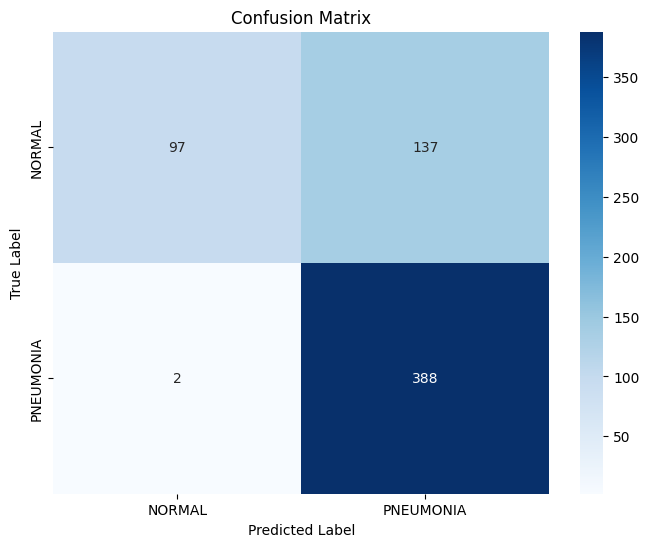

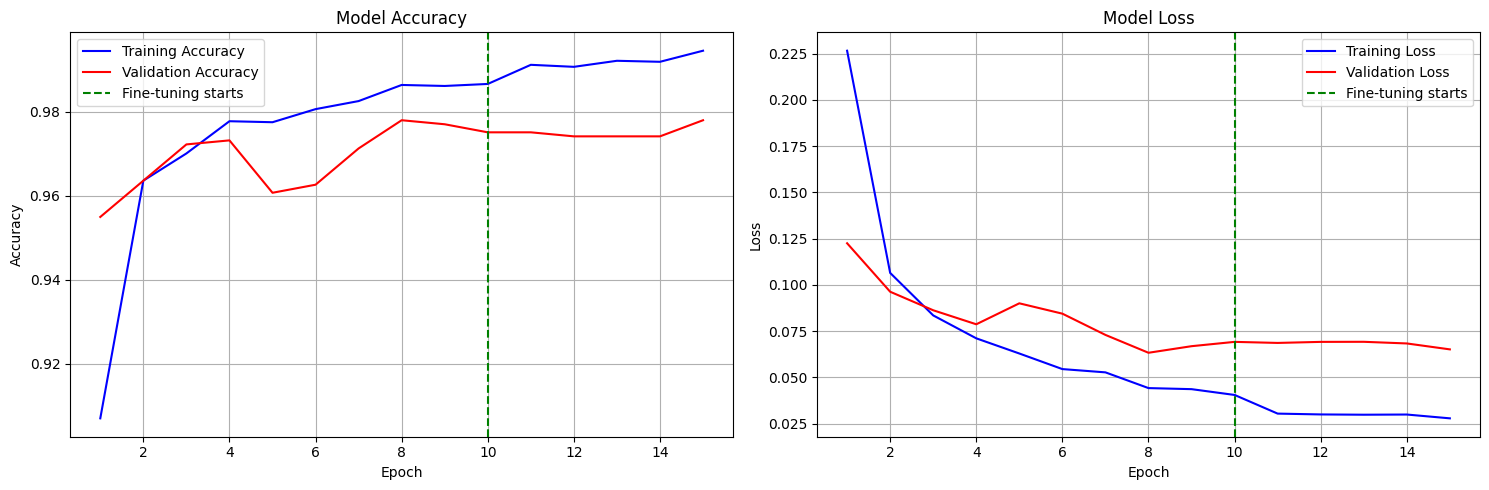

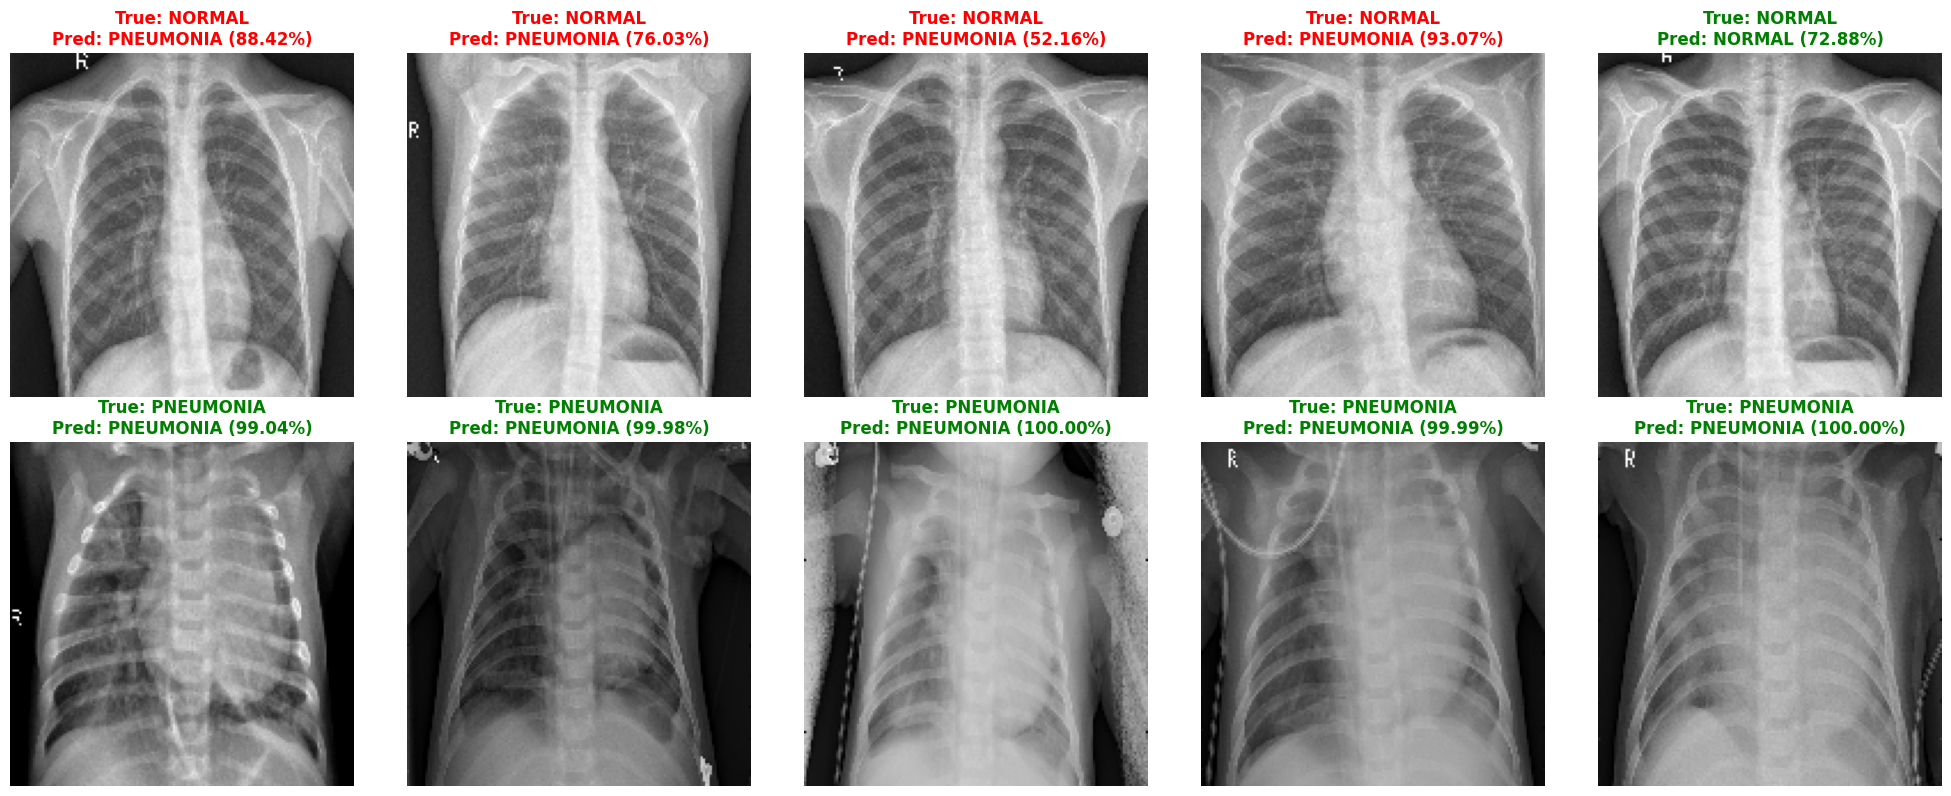


Sample predictions complete!
Correct predictions: 6/10

Saving model in TFLite format...
Saved artifact at '/tmp/tmpbqsggxuv'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  140480548199440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140480548200016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140480548200208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140480548199632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140480548201360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140480548200400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140480548200976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140480548200592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140480548199056: TensorSpec(shape=(), dtype=tf.resource, name=No

W0000 00:00:1759500317.971557      36 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1759500317.971592      36 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
I0000 00:00:1759500317.986379      36 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled


TFLite model saved: model.tflite

Converting to ONNX format...
⚠ tf2onnx not installed. Installing...
INFO: pip is looking at multiple versions of onnx to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 86.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: onnx
    Found existing installation: onnx 1.18.0
    Uninstalling onnx-1.18.0:
      Successfully uninstalled onnx-1.18.0
Please re-run this cell after installation.

Model Export Complete!

Files created:
  1. model.tflite - TensorFlow Lite model
  2. model.onnx - ONNX model (recommended for Streamlit)

Next steps:
  1. Download model.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
import os
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print(f"TensorFlow version: {tf.__version__}")
print(f"GPU available: {tf.config.list_physical_devices('GPU')}")

# %% [markdown]
# ## Step 2: Configure Paths and Hyperparameters

# %%
# Dataset path
DATA_DIR = '/kaggle/input/chest-xray-pneumonia/chest_xray'

# Model hyperparameters
IMG_SIZE = 150
BATCH_SIZE = 32
EPOCHS_FEATURE_EXTRACTION = 10
EPOCHS_FINE_TUNING = 5
LEARNING_RATE_INITIAL = 1e-4
LEARNING_RATE_FINE_TUNE = 1e-5
VALIDATION_SPLIT = 0.20

print(f"Configuration:")
print(f"  Image size: {IMG_SIZE}x{IMG_SIZE}")
print(f"  Batch size: {BATCH_SIZE}")
print(f"  Validation split: {VALIDATION_SPLIT:.0%}")

# %% [markdown]
# ## Step 3: Data Loading with Proper Split
# 
# We use the entire 'train' folder and split it 80/20 for training and validation.
# This ensures a larger validation set than the original dataset provides.

# %%
# Data augmentation for training
full_train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=VALIDATION_SPLIT
)

# Training generator (80% of train folder)
train_generator = full_train_datagen.flow_from_directory(
    os.path.join(DATA_DIR, 'train'),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

# Validation generator (20% of train folder)
validation_generator = full_train_datagen.flow_from_directory(
    os.path.join(DATA_DIR, 'train'),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# Test generator (held-out test set)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    os.path.join(DATA_DIR, 'test'),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

print(f"\nDataset Statistics:")
print(f"  Training samples: {train_generator.samples}")
print(f"  Validation samples: {validation_generator.samples}")
print(f"  Test samples: {test_generator.samples}")
print(f"\nClass mapping: {train_generator.class_indices}")

# %% [markdown]
# ## Step 4: Build Transfer Learning Model (VGG16)
# 
# We use VGG16 pre-trained on ImageNet as the base model, freezing its weights initially.
# Custom classification layers are added on top for binary classification.

# %%
# Load pre-trained VGG16 (without top classification layer)
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create final model
model = Model(inputs=base_model.input, outputs=predictions)

print(f"\nModel Architecture:")
model.summary()

# %% [markdown]
# ## Step 5: Phase 1 - Feature Extraction Training
# 
# Train only the new top layers while keeping VGG16 weights frozen.

# %%
# Compile model
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE_INITIAL),
    metrics=['accuracy']
)

print("\n" + "="*60)
print("PHASE 1: Feature Extraction Training")
print("="*60)

# Train
history_phase1 = model.fit(
    train_generator,
    epochs=EPOCHS_FEATURE_EXTRACTION,
    validation_data=validation_generator,
    verbose=1
)

print("\nPhase 1 complete!")

# %% [markdown]
# ## Step 6: Phase 2 - Fine-Tuning
# 
# Unfreeze the last few layers of VGG16 and retrain with a very small learning rate.

# %%
# Unfreeze base model
base_model.trainable = True

# Freeze all except last 4 layers
for layer in base_model.layers[:-4]:
    layer.trainable = False

# Recompile with smaller learning rate
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE_FINE_TUNE),
    metrics=['accuracy']
)

print("\n" + "="*60)
print("PHASE 2: Fine-Tuning Training")
print("="*60)
print(f"Trainable layers: {sum([1 for layer in model.layers if layer.trainable])}")

# Continue training
history_phase2 = model.fit(
    train_generator,
    epochs=EPOCHS_FINE_TUNING,
    validation_data=validation_generator,
    verbose=1
)

print("\nPhase 2 complete!")

# %% [markdown]
# ## Step 7: Model Evaluation on Test Set

# %%
print("\n" + "="*60)
print("Evaluating on Test Set")
print("="*60)

# Get predictions
test_generator.reset()
predictions = model.predict(test_generator, verbose=1)
predicted_classes = (predictions > 0.5).astype(int).flatten()
true_classes = test_generator.classes

# Calculate metrics
test_loss, test_accuracy = model.evaluate(test_generator, verbose=0)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(
    true_classes,
    predicted_classes,
    target_names=['NORMAL', 'PNEUMONIA']
))

# Confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['NORMAL', 'PNEUMONIA'],
            yticklabels=['NORMAL', 'PNEUMONIA'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# %% [markdown]
# ## Step 8: Visualize Training History

# %%
# Combine both training phases
total_epochs = EPOCHS_FEATURE_EXTRACTION + EPOCHS_FINE_TUNING
epochs_range = range(1, total_epochs + 1)

# Combine histories
train_acc = history_phase1.history['accuracy'] + history_phase2.history['accuracy']
val_acc = history_phase1.history['val_accuracy'] + history_phase2.history['val_accuracy']
train_loss = history_phase1.history['loss'] + history_phase2.history['loss']
val_loss = history_phase1.history['val_loss'] + history_phase2.history['val_loss']

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy plot
ax1.plot(epochs_range, train_acc, 'b-', label='Training Accuracy')
ax1.plot(epochs_range, val_acc, 'r-', label='Validation Accuracy')
ax1.axvline(x=EPOCHS_FEATURE_EXTRACTION, color='g', linestyle='--', label='Fine-tuning starts')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# Loss plot
ax2.plot(epochs_range, train_loss, 'b-', label='Training Loss')
ax2.plot(epochs_range, val_loss, 'r-', label='Validation Loss')
ax2.axvline(x=EPOCHS_FEATURE_EXTRACTION, color='g', linestyle='--', label='Fine-tuning starts')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# %% [markdown]
# ## Step 9: Test Inference on Sample Images
# 
# Test the model on a balanced set of normal and pneumonia images.

# %%
# Get sample images (balanced)
test_generator.reset()
sample_images = []
sample_labels = []
sample_filenames = []

# Collect 5 normal and 5 pneumonia samples
normal_count = 0
pneumonia_count = 0

for i in range(len(test_generator)):
    batch_images, batch_labels = test_generator[i]
    batch_filenames = test_generator.filenames[i*BATCH_SIZE:(i+1)*BATCH_SIZE]
    
    for img, label, fname in zip(batch_images, batch_labels, batch_filenames):
        if label == 0 and normal_count < 5:  # NORMAL
            sample_images.append(img)
            sample_labels.append(label)
            sample_filenames.append(fname)
            normal_count += 1
        elif label == 1 and pneumonia_count < 5:  # PNEUMONIA
            sample_images.append(img)
            sample_labels.append(label)
            sample_filenames.append(fname)
            pneumonia_count += 1
    
    if normal_count >= 5 and pneumonia_count >= 5:
        break

sample_images = np.array(sample_images)

# Make predictions
sample_predictions = model.predict(sample_images, verbose=0)

# Visualize results
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for idx, (img, true_label, pred, fname) in enumerate(zip(sample_images, sample_labels, sample_predictions, sample_filenames)):
    axes[idx].imshow(img)
    true_class = 'PNEUMONIA' if true_label == 1 else 'NORMAL'
    pred_class = 'PNEUMONIA' if pred[0] > 0.5 else 'NORMAL'
    confidence = pred[0] if pred[0] > 0.5 else 1 - pred[0]
    
    color = 'green' if true_class == pred_class else 'red'
    axes[idx].set_title(f'True: {true_class}\nPred: {pred_class} ({confidence:.2%})', 
                        color=color, fontweight='bold')
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

print(f"\nSample predictions complete!")
print(f"Correct predictions: {sum([1 for t, p in zip(sample_labels, sample_predictions) if (t == 1 and p > 0.5) or (t == 0 and p <= 0.5)])}/10")

# %% [markdown]
# ## Step 10: Export Model to ONNX Format
# 
# Convert the Keras model to ONNX for lightweight deployment.

# %%
# Save as TFLite first (intermediate step)
print("\nSaving model in TFLite format...")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
    f.write(tflite_model)
print("TFLite model saved: model.tflite")

# Convert to ONNX
print("\nConverting to ONNX format...")
try:
    import tf2onnx
    import onnx
    
    # Convert using tf2onnx
    model_proto, _ = tf2onnx.convert.from_keras(
        model,
        input_signature=[tf.TensorSpec(shape=[None, IMG_SIZE, IMG_SIZE, 3], dtype=tf.float32, name='input')],
        opset=13
    )
    
    # Save ONNX model
    onnx.save(model_proto, 'model.onnx')
    print("ONNX model saved: model.onnx")
    
    # Verify ONNX model
    onnx_model = onnx.load('model.onnx')
    onnx.checker.check_model(onnx_model)
    print("ONNX model is valid!")
    
    # Test ONNX inference
    import onnxruntime as ort
    session = ort.InferenceSession('model.onnx')
    input_name = session.get_inputs()[0].name
    
    # Test with one sample
    test_input = sample_images[0:1]
    onnx_output = session.run(None, {input_name: test_input})[0]
    keras_output = model.predict(test_input, verbose=0)
    
    print(f"\nONNX vs Keras output comparison:")
    print(f"  Keras: {keras_output[0][0]:.6f}")
    print(f"  ONNX:  {onnx_output[0][0]:.6f}")
    print(f"  Difference: {abs(keras_output[0][0] - onnx_output[0][0]):.8f}")
    
    if abs(keras_output[0][0] - onnx_output[0][0]) < 0.01:
        print("\n✓ ONNX conversion successful! Outputs match.")
    else:
        print("\n⚠ Warning: ONNX outputs differ from Keras")
        
except ImportError:
    print("⚠ tf2onnx not installed. Installing...")
    import subprocess
    subprocess.check_call(['pip', 'install', 'tf2onnx', 'onnx', 'onnxruntime'])
    print("Please re-run this cell after installation.")
except Exception as e:
    print(f"✗ ONNX conversion failed: {str(e)}")
    print("\nYou can still use the TFLite model (model.tflite)")

# %% [markdown]
# ## Step 11: Download Models
# 
# Download the ONNX model for deployment to Streamlit Cloud.

# %%
print("\n" + "="*60)
print("Model Export Complete!")
print("="*60)
print("\nFiles created:")
print("  1. model.tflite - TensorFlow Lite model")
print("  2. model.onnx - ONNX model (recommended for Streamlit)")
print("\nNext steps:")
print("  1. Download model.onnx")
print("  2. Upload to Hugging Face: aaburakhia/Pneumonia-Detector-CareAI")
print("  3. Deploy to Streamlit Cloud with updated code")

# For Kaggle/Colab, download the file
try:
    from google.colab import files
    files.download('model.onnx')
    print("\n✓ Download started!")
except:
    print("\n✓ Model files saved to current directory")

In [2]:
# Dedicated ONNX Conversion Cell
# Run this after your model is trained

import tensorflow as tf
import numpy as np
import os

print("Starting ONNX conversion...")

# Check if model exists
if 'model' not in dir():
    print("ERROR: Model not found in memory. Please train the model first.")
else:
    # Method 1: Try tf2onnx (preferred)
    try:
        import tf2onnx
        import onnx
        
        print("\nUsing tf2onnx for conversion...")
        
        # Convert
        spec = tf.TensorSpec([None, 150, 150, 3], tf.float32, name='input')
        model_proto, _ = tf2onnx.convert.from_keras(
            model,
            input_signature=[spec],
            opset=13
        )
        
        # Save
        onnx.save(model_proto, 'model.onnx')
        print("ONNX model saved!")
        
        # Verify file exists
        if os.path.exists('model.onnx'):
            file_size = os.path.getsize('model.onnx') / (1024 * 1024)
            print(f"File size: {file_size:.2f} MB")
            
            # Test inference
            import onnxruntime as ort
            sess = ort.InferenceSession('model.onnx')
            test_input = np.random.random((1, 150, 150, 3)).astype(np.float32)
            onnx_out = sess.run(None, {'input:0': test_input})
            keras_out = model.predict(test_input, verbose=0)
            
            print(f"\nValidation:")
            print(f"  Keras output: {keras_out[0][0]:.6f}")
            print(f"  ONNX output:  {onnx_out[0][0][0]:.6f}")
            print(f"  Difference:   {abs(keras_out[0][0] - onnx_out[0][0][0]):.8f}")
            
            if abs(keras_out[0][0] - onnx_out[0][0][0]) < 0.01:
                print("\nSUCCESS! ONNX model is valid and matches Keras.")
            
            # Download for Colab
            try:
                from google.colab import files
                files.download('model.onnx')
                print("\nDownload started!")
            except:
                print("\nFile saved to current directory.")
        else:
            print("ERROR: model.onnx was not created")
            
    except Exception as e:
        print(f"\ntf2onnx failed: {str(e)}")
        print("\nTrying alternative method...")
        
        # Method 2: Save as SavedModel first, then convert
        try:
            print("Saving as SavedModel...")
            tf.saved_model.save(model, 'saved_model')
            
            # Convert SavedModel to ONNX
            import subprocess
            result = subprocess.run([
                'python', '-m', 'tf2onnx.convert',
                '--saved-model', 'saved_model',
                '--output', 'model.onnx',
                '--opset', '13'
            ], capture_output=True, text=True)
            
            print(result.stdout)
            if result.returncode != 0:
                print(result.stderr)
            
            if os.path.exists('model.onnx'):
                print("\nSUCCESS with alternative method!")
                try:
                    from google.colab import files
                    files.download('model.onnx')
                except:
                    pass
            else:
                print("\nERROR: Conversion failed")
                
        except Exception as e2:
            print(f"Alternative method also failed: {str(e2)}")
            print("\nPlease check if tf2onnx is installed:")
            print("!pip install tf2onnx onnx onnxruntime")

Starting ONNX conversion...

Using tf2onnx for conversion...


I0000 00:00:1759501887.688759      36 devices.cc:67] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
I0000 00:00:1759501887.688977      36 single_machine.cc:361] Starting new session
I0000 00:00:1759501887.690148      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0
I0000 00:00:1759501890.043383      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0
I0000 00:00:1759501890.520526      36 devices.cc:67] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
I0000 00:00:1759501890.520679      36 single_machine.cc:361] Starting new session
I0000 00:00:1759501890.521613      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 wi

ONNX model saved!
File size: 72.15 MB

tf2onnx failed: Required inputs (['input']) are missing from input feed (['input:0']).

Trying alternative method...
Saving as SavedModel...


SUCCESS with alternative method!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>